In [1]:
import pygor3 as igor

# Generate sequences
Use a IgorModel and generate sequences

## An IGoR default model can be used to generate sequences

In [2]:
hb_mdl = igor.get_default_IgorModel("human", "tcr_beta")

modelpath :  /home/olivares/.local/share/igor/models
modelpath :  /home/olivares/.local/share/igor/models
Parms filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_parms.txt
Marginals filename:  /home/olivares/.local/share/igor/models/human/tcr_beta/models/model_marginals.txt
modelpath :  /home/olivares/.local/share/igor/models


In [3]:
sequences = igor.generate(10, hb_mdl)

Writing model parms in file  ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata/models/model_marginals.txt
Writing model parms in file  ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//models/model_parms.txt
Writing model marginals in file  ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_generating_w8xncmff -batch dataIGoRm3vNo02aij -set_custom_model ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//models/model_parms.txt ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//models/model_marginals.txt -set_CDR3_anchors  --V ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//ref_genome/V_gene_CDR3_anchors.csv --J ./igor_generating_w8xncmff/dataIGoRm3vNo02aij_mdldata//ref_genome/J_gene_CDR3_anchors.csv -generate 10 


In [4]:
sequences

,nt_sequence
seq_index,
0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...
1,GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...
2,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...
3,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
4,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...
5,GAGACTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...
6,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
7,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
8,GATGCTGGAGTTATCCAGTCACCCCGGCACGAGGTGACAGAGATGG...


# Download gene templates
Get the list of available species in IMGT website

In [5]:
igor.get_imgt_list_species()

['',
 'Macaca+nemestrina',
 'Mustela+putorius+furo',
 'Danio+rerio',
 'Rattus+rattus',
 'Capra+hircus',
 'Equus+caballus',
 'Felis+catus',
 'Sus+scrofa',
 'Tursiops+truncatus',
 'Ornithorhynchus+anatinus',
 'Gallus+gallus',
 'Oryctolagus+cuniculus',
 'Homo+sapiens',
 'Vicugna+pacos',
 'Macaca+fascicularis',
 'Camelus+dromedarius',
 'Mus+musculus',
 'Mus+cookii',
 'Cercocebus+atys',
 'Mus+pahari',
 'Papio+anubis+anubis',
 'Bos+taurus',
 'Macaca+mulatta',
 'Oncorhynchus+mykiss',
 'Canis+lupus+familiaris',
 'Ovis+aries',
 'Mus+spretus',
 'Rattus+norvegicus',
 'Mus+saxicola',
 'Salmo+salar',
 'Mus+minutoides']

In [6]:
#ref_genome = IgorRefGenome.load_VDJ_from_IMGT_website("Homo+sapiens", "TRB")
ref_genome = igor.get_IgorRefGenome_VDJ_from_IMGT("Homo+sapiens", "TRB")

Homo+sapiens TRBV http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBV&species=Homo+sapiens
Homo+sapiens TRBD http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBD&species=Homo+sapiens
Homo+sapiens TRBJ http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=7.2+TRBJ&species=Homo+sapiens
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+TRBJ&species=Homo+sapiens&IMGTlabel=J-TRP
http://www.imgt.org/genedb/GENElect?query=8.1+TRBV&species=Homo+sapiens&IMGTlabel=2nd-CYS
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&species=Homo+sapiens&IMGTlabel=J-PHE
http://www.imgt.org/genedb/GENElect?query=8.1+Homo+sapiensJ&s

## Check dataframes of downloaded sequences

In [7]:
ref_genome.to_dict()

{'V':                name                                              value  \
 id                                                                       
 0          TRBV1*01  GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...   
 1       TRBV10-1*01  GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...   
 2       TRBV10-1*02  GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...   
 3       TRBV10-1*03  AGGCAGGTGACCTTGGCGTGTCACCAGACTTGGAACCACAACAATA...   
 4       TRBV10-2*01  GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...   
 ..              ...                                                ...   
 163        TRBVA*02  GAAGCTGAAGCCACCTAGACTCTAAGACACCTGATTGCAGAGACAG...   
 164  TRBVA/OR9-2*01  GAAGCTGAAGTCACCTAGACTCCAAGACACCTGATTGTAGAGACAG...   
 165        TRBVB*01  AATGTCAAAGTAACACAGACCCTGAGATGAGGCAGGAAAGTTGTAT...   
 166        TRBVB*02  AATGTCAAAGTAACACAGACCCTGAGATGAGGCAGGAAAGTTGTAT...   
 167        TRBVC*01  CTTCTAAATTGGTCTATGAAGGAGAATCTCCCCCATTCCTGGAGTC...   
 
      anchor_index

## Remove gene V and J templates without CDR3 anchors

In [8]:
# TODO: Add flag with default
ref_genome.clean_empty_anchors()
ref_genome.to_dict()

{'V':             name                                              value  \
 id                                                                    
 0       TRBV1*01  GATACTGGAATTACCCAGACACCAAAATACCTGGTCACAGCAATGG...   
 1    TRBV10-1*01  GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...   
 2    TRBV10-1*02  GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...   
 3    TRBV10-2*01  GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...   
 4    TRBV10-2*02  GATGCTGGAATCACCCAGAGCCCAAGATACAAGATCACAGAGACAG...   
 ..           ...                                                ...   
 140   TRBV8-1*02  GAGGCAGGGATCAGCCAGATACCAAGATATCACAGACACACAGGGA...   
 141   TRBV8-2*02  GATGCTGGGATCACCCAGATGCCAAGATATCACATTGTACAGAAGA...   
 142     TRBV9*01  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...   
 143     TRBV9*02  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...   
 144     TRBV9*03  GATTCTGGAGTCACACAAACCCCAAAGCACCTGATCACAGCAACTG...   
 
      anchor_index gfunction  
 id                       

# Make a model using a IgorRefGenome instance
This method generate a new IgorModel with uniform distribution for the conditional probabilities. If IgorRefGenome instance has D gene, then VDJ default model will be generated otherwise VJ model.

In [9]:
mdl_ini = igor.Model.make_default_model_from_IgorRefGenome(ref_genome)
print(mdl_ini)

.xdata['v_3_del', 'v_choice', 'vd_ins', 'dj_dinucl', 'd_gene', 'd_5_del', 'vd_dinucl', 'j_5_del', 'd_3_del', 'j_choice', 'dj_ins']


In [10]:
mdl_ini['v_choice']

<xarray.DataArray (v_choice: 145)>
array([0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655,
       0.00689655, 0.00689655, 0.00689655, 0.00689655, 0.00689655])
Coordinates:
  * v_choice       (v_choice) int64 0 1 2 3 4 5 6 ... 139 140 141 142 143 144
    lbl__v_choice  (v_choice) object 'TRBV1*01' 'TRBV10-1*01' ... 'TRBV9*03'
    seq__v_choice  (v_choice) object 'GATACTGGAATTACCCAGACACCAAAATACCTGGTCACA...
Attributes:
    nickname:    v_choice
    event_type:  GeneChoice
    seq_type:    V_gene
    seq_side:    Undefined_side
    priority:    7
    parents:     []
    childs:      ['j_choice', 'd_gene', 'v_3_del']

In [11]:
mdl_new, df_likelihood = igor.infer(sequences, mdl_ini)


Writing model parms in file  ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_inferring_lwaw96hu -batch dataIGoRh16Qv3twGh -read_seqs ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGhinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_inferring_lwaw96hu -batch dataIGoRh16Qv3twGh -set_genomic  --V ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/ref_genome/genomicVs.fasta --D ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/ref_genome/genomicDs.fasta --J ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_inferring_lwaw96hu/dataIGoRh16Qv3twGh_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
== Alignment finished! ==
Writing model 

In [12]:
df_likelihood

,iteration,mean_log_Likelihood,n_seq
0,1,-17.13000,10
1,2,-9.37992,10
2,3,-8.49343,10
3,4,-8.12628,10
4,5,-8.03973,10


<AxesSubplot:>

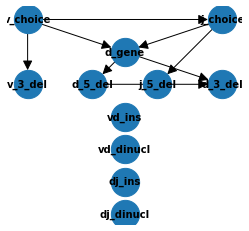

In [13]:
mdl_new.plot_Bayes_network()

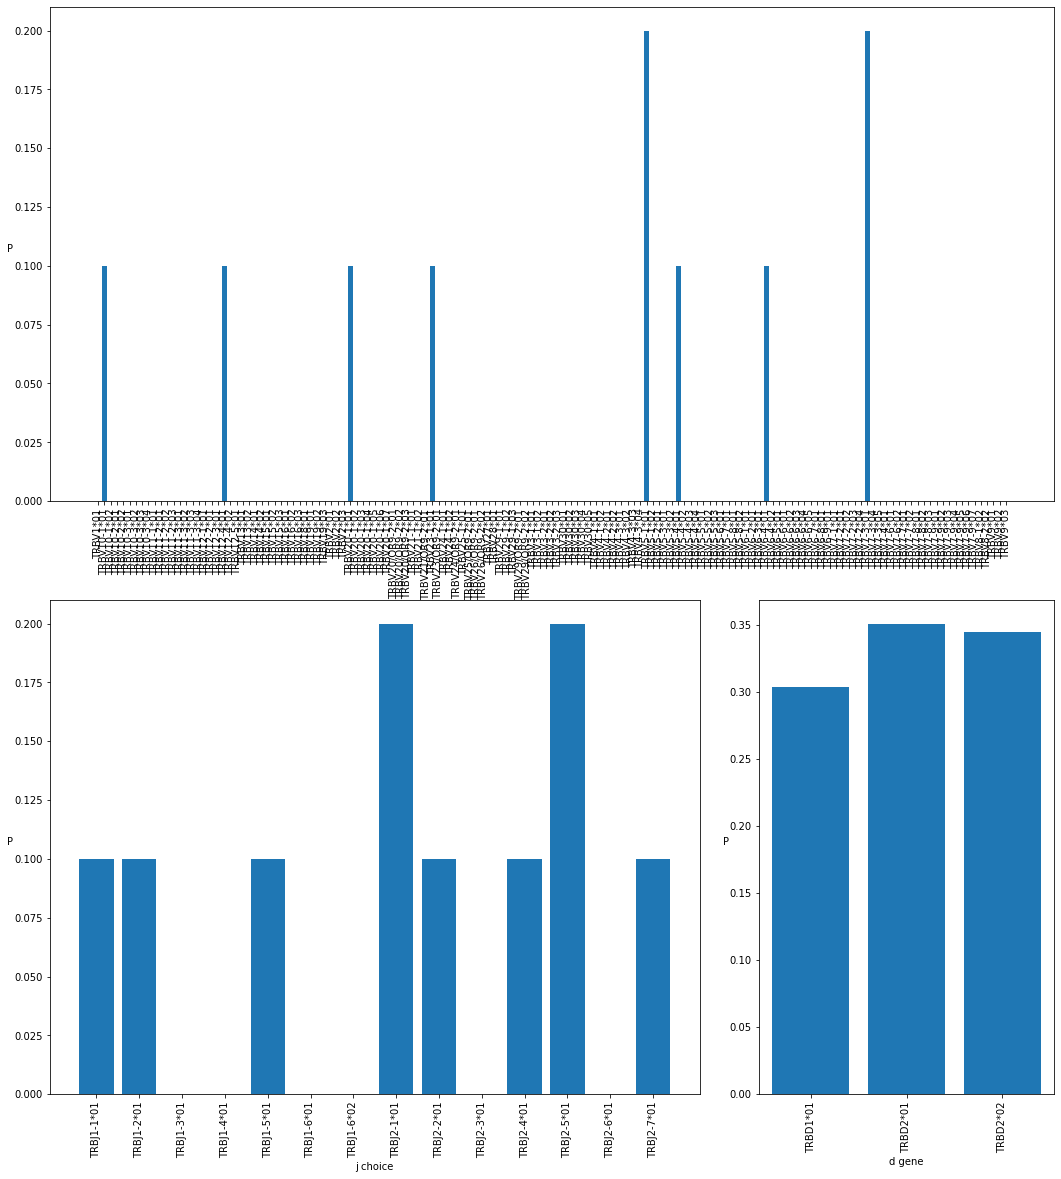

In [14]:
figura = mdl_new.plot_GeneChoice_Pmarginal()


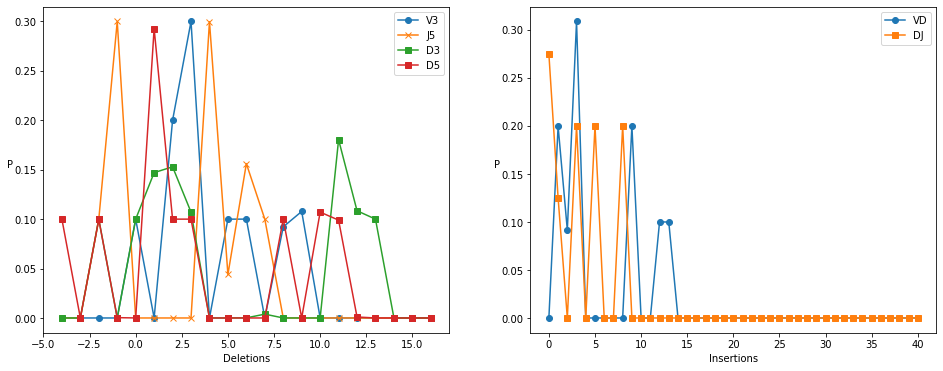

In [15]:
figura = mdl_new.plot_InsertionsDeletions_Pmarginal()

## Direct access to anchors by id

In [16]:
mdl_ini.V_anchors

id
0      267
1      270
2      270
3      270
4      270
      ... 
140    265
141    257
142    270
143    270
144    270
Name: anchor_index, Length: 145, dtype: int64

In [17]:
mdl_new.V_anchors

id
0      267
1      270
2      270
3      270
4      270
      ... 
140    265
141    257
142    270
143    270
144    270
Name: anchor_index, Length: 145, dtype: int64

In [18]:
sequences

,nt_sequence
seq_index,
0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...
1,GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...
2,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...
3,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
4,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...
5,GAGACTGGAGTCACCCAAAGTCCCACACACCTGATCAAAACGAGAG...
6,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...
7,GGTGCTGTCGTCTCTCAACATCCGAGCTGGGTTATCTGTAAGAGTG...
8,GATGCTGGAGTTATCCAGTCACCCCGGCACGAGGTGACAGAGATGG...


In [19]:
# Evaluate sequences
df_airr_sequences = igor.evaluate(sequences, mdl_new, N_scenarios=5)

Writing model parms in file  ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_1hzyeljx -batch dataIGoR39mPgNHdw8 -read_seqs ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8input_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_1hzyeljx -batch dataIGoR39mPgNHdw8 -set_genomic  --V ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_1hzyeljx/dataIGoR39mPgNHdw8_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

In [20]:
df_airr_sequences.head() #[['sequence_id','pgen', 'scenario_prob_cond_seq' ]]

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_score,v_identity,v_support,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,v_alignment_start,v_alignment_end,d_score,d_identity,d_support,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,d_alignment_start,d_alignment_end,j_score,j_identity,j_support,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,j_alignment_start,j_alignment_end,sequence_aa,vj_in_frame,stop_codon,complete_vdj,locus,sequence_alignment_aa,n1_length,np1,np1_aa,np1_length,n2_length,np2,np2_aa,np2_length,p3v_length,p5d_length,p3d_length,p5j_length,scenario_rank,scenario_proba_cond_seq,pgen,quality,quality_alignment
0,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,3M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,15,NaN,NaN,287,288,2,4,NaN,NaN,250,NaN,NaN,9,57,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,CTT,NaN,3,3,GAA,NaN,7,0,4,0,2,1,9.998680e-01,0.000001,NaN,NaN
1,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,TRBV6-4*01,TRBD2*02,TRBJ2-1*01,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,3M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,15,NaN,NaN,287,288,2,4,NaN,NaN,250,NaN,NaN,9,57,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,CTT,NaN,3,3,GAA,NaN,7,0,4,0,2,2,1.314840e-04,0.000001,NaN,NaN
2,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,3M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,15,NaN,NaN,287,288,2,4,NaN,NaN,250,NaN,NaN,11,59,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,CTT,NaN,3,5,GAAAG,NaN,9,0,4,0,0,3,1.313840e-07,0.000001,NaN,NaN
3,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,1M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,5,NaN,NaN,287,286,2,2,NaN,NaN,250,NaN,NaN,9,57,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,CTT,NaN,3,5,GGGAA,NaN,9,0,4,0,2,4,4.807220e-09,0.000001,NaN,NaN
4,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,TRBV6-4*01,TRBD2*02,TRBJ2-1*01,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,1M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,5,NaN,NaN,287,286,2,2,NaN,NaN,250,NaN,NaN,9,57,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,CTT,NaN,3,5,GGGAA,NaN,9,0,4,0,2,5,2.847810e-11,0.000001,NaN,NaN


In [21]:
df_airr_sequences.columns

Index(['sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call',
       'j_call', 'sequence_alignment', 'germline_alignment', 'junction',
       'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'v_score', 'v_identity',
       'v_support', 'v_sequence_start', 'v_sequence_end', 'v_germline_start',
       'v_germline_end', 'v_alignment_start', 'v_alignment_end', 'd_score',
       'd_identity', 'd_support', 'd_sequence_start', 'd_sequence_end',
       'd_germline_start', 'd_germline_end', 'd_alignment_start',
       'd_alignment_end', 'j_score', 'j_identity', 'j_support',
       'j_sequence_start', 'j_sequence_end', 'j_germline_start',
       'j_germline_end', 'j_alignment_start', 'j_alignment_end', 'sequence_aa',
       'vj_in_frame', 'stop_codon', 'complete_vdj', 'locus',
       'sequence_alignment_aa', 'n1_length', 'np1', 'np1_aa', 'np1_length',
       'n2_length', 'np2', 'np2_aa', 'np2_length', 'p3v_length', 'p5d_length',
       'p3d_length', 'p5j_length', 'scenario_rank'

In [22]:
df_airr_sequences[['sequence_id', 'sequence', 'v_call', 'd_call', 'j_call', 'pgen', 'scenario_rank', 'scenario_proba_cond_seq']].head()

,sequence_id,sequence,v_call,d_call,j_call,pgen,scenario_rank,scenario_proba_cond_seq
0,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,0.000001,1,9.998680e-01
1,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*02,TRBJ2-1*01,0.000001,2,1.314840e-04
2,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,0.000001,3,1.313840e-07
3,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,0.000001,4,4.807220e-09
4,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*02,TRBJ2-1*01,0.000001,5,2.847810e-11


In [23]:
# mdl_ini.parms.df_V_anchors
mdl_ini.V_anchors

id
0      267
1      270
2      270
3      270
4      270
      ... 
140    265
141    257
142    270
143    270
144    270
Name: anchor_index, Length: 145, dtype: int64

In [24]:
# mdl_new.parms.df_V_anchors
mdl_new.V_anchors

id
0      267
1      270
2      270
3      270
4      270
      ... 
140    265
141    257
142    270
143    270
144    270
Name: anchor_index, Length: 145, dtype: int64

In [25]:
seqs_pgen = igor.evaluate_pgen(sequences, mdl_new)

Writing model parms in file  ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_qq0unf6s -batch dataIGoR5a5Jv3kiHW -read_seqs ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHWinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_qq0unf6s -batch dataIGoR5a5Jv3kiHW -set_genomic  --V ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_qq0unf6s/dataIGoR5a5Jv3kiHW_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

In [26]:
seqs_pgen.head()

,sequence_id,sequence,v_call,d_call,j_call,pgen
0,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,TRBV6-4*01,TRBD2*01,TRBJ2-1*01,1.006100e-06
1,1,GGTGCTGGAGTCTCCCAGACCCCCAGTAACAAGGTCACAGAGAAGG...,TRBV7-3*01,TRBD2*02,TRBJ1-5*01,3.241680e-05
2,2,CATGCCAAAGTCACACAGACTCCAGGACATTTGGTCAAAGGAAAAG...,TRBV23-1*01,TRBD1*01,TRBJ2-4*01,4.075670e-08
3,3,AAGGCTGGAGTCACTCAAACTCCAAGATATCTGATCAAAACGAGAG...,TRBV5-1*01,TRBD2*02,TRBJ1-2*01,4.256170e-12
4,4,GATGCTGAAATCACCCAGAGCCCAAGACACAAGATCACAGAGACAG...,TRBV10-1*01,TRBD1*01,TRBJ2-5*01,3.701530e-05


## One sequence only

In [27]:
one_sequence = sequences.loc[0]['nt_sequence']
one_sequence

'ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAGGACGGCGCATGACACTGAGATGTACCCAGGATATGAGACATAATGCCATGTACTGGTATAGACAAGATCTAGGACTGGGGCTAAGGCTCATCCATTATTCAAATACTGCAGGTACCACTGGCAAAGGAGAAGTCCCTGATGGTTATAGTGTCTCCAGAGCAAACACAGATGATTTCCTCCTCACGTTGGCGTCTGCTGTACCCTCTCAGACATCTGTGTACTTCTGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAGTTCTTCGGGCCAGGGACACGGCTCACCGTGCTAG'

In [28]:
seqs = igor.evaluate(one_sequence[20:], hb_mdl, N_scenarios=1)


Writing model parms in file  ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_z0xzw321 -batch dataIGoRYVwTWkkzIi -read_seqs ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIiinput_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_z0xzw321 -batch dataIGoRYVwTWkkzIi -set_genomic  --V ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_z0xzw321/dataIGoRYVwTWkkzIi_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

In [29]:
seqs.head()

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_score,v_identity,v_support,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,v_alignment_start,v_alignment_end,d_score,d_identity,d_support,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,d_alignment_start,d_alignment_end,j_score,j_identity,j_support,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,j_alignment_start,j_alignment_end,sequence_aa,vj_in_frame,stop_codon,complete_vdj,locus,sequence_alignment_aa,n1_length,np1,np1_aa,np1_length,n2_length,np2,np2_aa,np2_length,p3v_length,p5d_length,p3d_length,p5j_length,scenario_rank,scenario_proba_cond_seq,pgen,quality,quality_alignment
0,0,ACCAACATCTCAGATCCTGGCAGCAGGACGGCGCATGACACTGAGA...,F,NaN,X61653|TRBV6-4*01|Homo sapiens|F|V-REGION|426....,TRBD2*01,X02987|TRBJ2-1*01|Homo sapiens|F|J-REGION|800....,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,5M,50M,1425,NaN,NaN,2,285,21,283,NaN,NaN,25,NaN,NaN,290,293,10,14,NaN,NaN,250,NaN,NaN,6,54,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,CTTTCC,NaN,6,2,AA,NaN,2,0,0,0,2,1,0.291515,7.937280e-13,NaN,NaN


In [30]:
# TODO: ADD PRODUCTIVE AND CDR3 

In [31]:
one_seq_airr = igor.evaluate(one_sequence, hb_mdl , N_scenarios=1)

Writing model parms in file  ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/models/model_parms.txt
Writing model marginals in file  ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/models/model_marginals.txt
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_soglflzp -batch dataIGoRCnq4BQJnS8 -read_seqs ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8input_sequences.csv
/home/olivares/.local/bin/igor -set_wd ./igor_evaluating_soglflzp -batch dataIGoRCnq4BQJnS8 -set_genomic  --V ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/ref_genome/genomicVs.fasta --D ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/ref_genome/genomicDs.fasta --J ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/ref_genome/genomicJs.fasta -set_CDR3_anchors  --V ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/ref_genome/V_gene_CDR3_anchors.csv --J ./igor_evaluating_soglflzp/dataIGoRCnq4BQJnS8_mdldata/ref_genome/J_gene_CDR3_anchors.csv -align  --all  
/home/olivares/.local/bin/igor

In [32]:
one_seq_airr

,sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,junction_aa,v_cigar,d_cigar,j_cigar,v_score,v_identity,v_support,v_sequence_start,v_sequence_end,v_germline_start,v_germline_end,v_alignment_start,v_alignment_end,d_score,d_identity,d_support,d_sequence_start,d_sequence_end,d_germline_start,d_germline_end,d_alignment_start,d_alignment_end,j_score,j_identity,j_support,j_sequence_start,j_sequence_end,j_germline_start,j_germline_end,j_alignment_start,j_alignment_end,sequence_aa,vj_in_frame,stop_codon,complete_vdj,locus,sequence_alignment_aa,n1_length,np1,np1_aa,np1_length,n2_length,np2,np2_aa,np2_length,p3v_length,p5d_length,p3d_length,p5j_length,scenario_rank,scenario_proba_cond_seq,pgen,quality,quality_alignment
0,0,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,F,NaN,X61653|TRBV6-4*01|Homo sapiens|F|V-REGION|426....,TRBD2*01,X02987|TRBJ2-1*01|Homo sapiens|F|J-REGION|800....,ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAG...,NaN,TGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAG...,NaN,285M,5M,50M,1425,NaN,NaN,2,285,1,283,NaN,NaN,25,NaN,NaN,290,293,10,14,NaN,NaN,250,NaN,NaN,6,54,2,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,CTTTCC,NaN,6,2,AA,NaN,2,0,0,0,2,1,0.291515,7.937280e-13,NaN,NaN


In [33]:
sequences.loc[0]['nt_sequence']

'ATTGCTGGGATCACCCAGGCACCAACATCTCAGATCCTGGCAGCAGGACGGCGCATGACACTGAGATGTACCCAGGATATGAGACATAATGCCATGTACTGGTATAGACAAGATCTAGGACTGGGGCTAAGGCTCATCCATTATTCAAATACTGCAGGTACCACTGGCAAAGGAGAAGTCCCTGATGGTTATAGTGTCTCCAGAGCAAACACAGATGATTTCCTCCTCACGTTGGCGTCTGCTGTACCCTCTCAGACATCTGTGTACTTCTGTGCCAGCAGTGACCTTTCCCGGGGAAAGCTCCTACAATGAGCAGTTCTTCGGGCCAGGGACACGGCTCACCGTGCTAG'

In [ ]:
one_pgen = igor.evaluate_pgen(one_sequence, mdl_new)
one_pgen

In [17]:
range(10)

range(0, 10)

In [16]:
for item in aa:
    print(item)

0
1
2
3
4
5
6
7
8
9


In [ ]:
import pygor3 as igor
task = igor.IgorTask()

In [70]:
print(task.igor_align_dict_options)

{'--all': {'active': True, 'value': '', 'dict_options': {'---thresh': {'active': False, 'value': '15', 'dict_options': {}}, '---matrix': {'active': False, 'value': 'path/to/file', 'dict_options': {}}, '---gap_penalty': {'active': False, 'value': 'X', 'dict_options': {}}, '---best_align_only': {'active': False, 'value': '', 'dict_options': {}}}}, '--V': {'active': False, 'value': '', 'dict_options': {'---thresh': {'active': False, 'value': '50', 'dict_options': {}}, '---matrix': {'active': False, 'value': 'path/to/file', 'dict_options': {}}, '---gap_penalty': {'active': False, 'value': 'X', 'dict_options': {}}, '---best_align_only': {'active': False, 'value': '', 'dict_options': {}}}}, '--D': {'active': False, 'value': '', 'dict_options': {'---thresh': {'active': False, 'value': '15', 'dict_options': {}}, '---matrix': {'active': False, 'value': 'path/to/file', 'dict_options': {}}, '---gap_penalty': {'active': False, 'value': 'X', 'dict_options': {}}, '---best_align_only': {'active': Fal

In [ ]:
task.igor_evaluate_dict_options['--N_iter']['value'] = 8
task.igor_evaluate_dict_options

In [ ]:
task.igor_output_dict_options